In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import umap
from matplotlib import pyplot as plt

In [2]:
#Read assay files

assay_train_file = '/raid/data/PUMA/4publication/data/assay_matrix_discrete_train_scaff_filt.csv'
assay_test_file = '/home/jupyter-nmoshkov@broadinst-04e9f/assay_matrix_discrete_test_scaff.csv'
assay_train_df = pd.read_csv(assay_train_file).fillna(-1)
assay_test_df = pd.read_csv(assay_test_file).fillna(-1)
assay_all_df = pd.concat([assay_train_df, assay_test_df])
assay_all_np = assay_all_df.to_numpy()[:, 1:].astype('int64')
assay_all_np

array([[-1, -1, -1, ..., -1, -1, -1],
       [ 0, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [3]:
# Consider only hits
assay_all_np_true = np.where(assay_all_np == 1,1,0)

In [4]:
assay_all_np_true

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

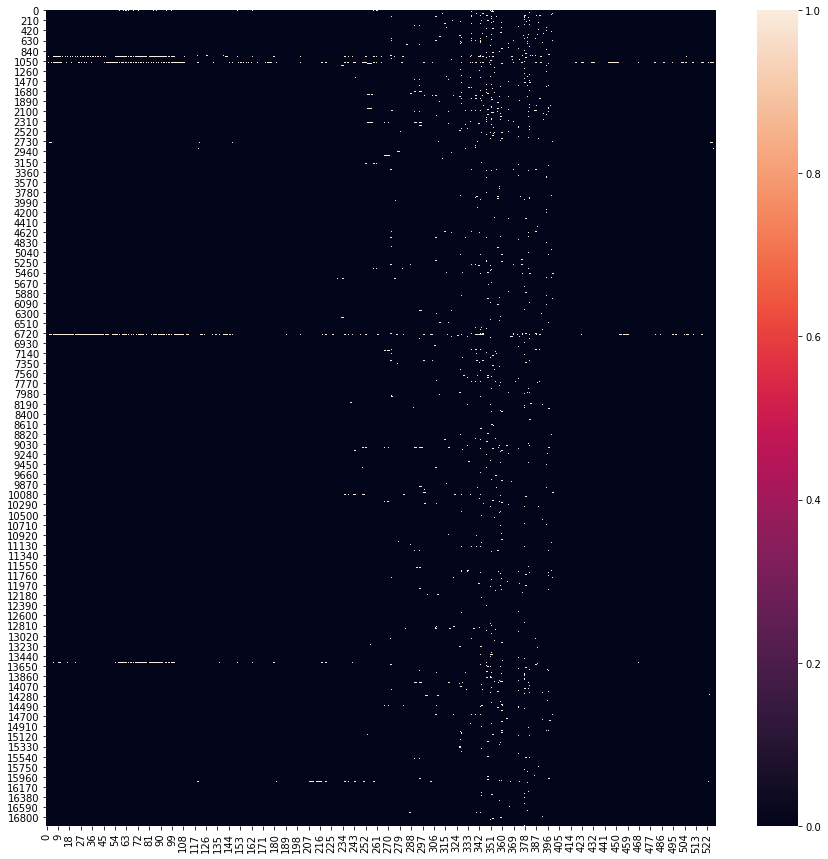

In [5]:
plt.gcf().set_size_inches(15, 15)
sb.heatmap(assay_all_np_true)

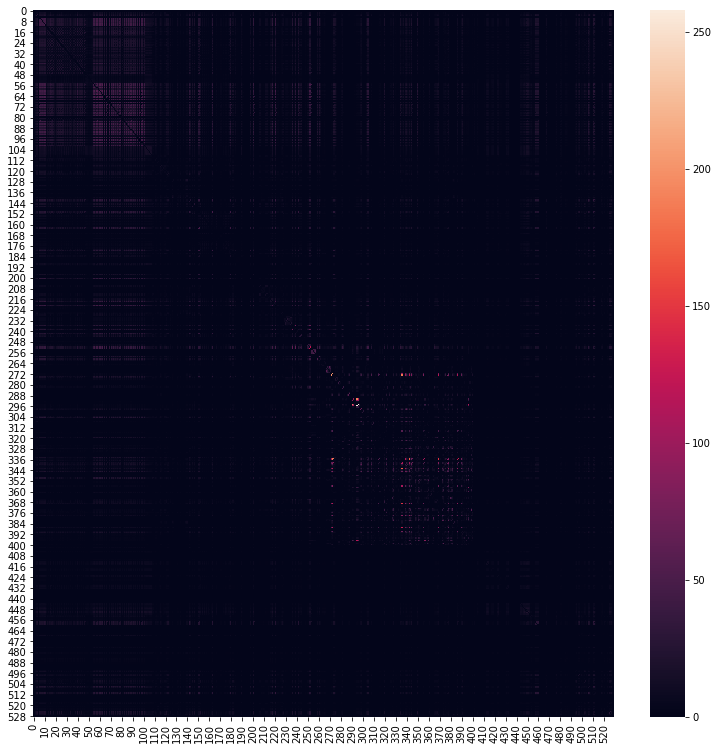

In [7]:
# intersection matrix, diagonal values are zeros
intersections = np.zeros((529,529))
assay_activations = []
for i in range(assay_all_np_true.shape[1]):
    assay_activations.append(set(np.argwhere(assay_all_np_true[:,i]==1).flatten()))
    
for i in range(529):
    for j in range(529):
        if i != j:
            intersections[i,j] = len(assay_activations[i].intersection(assay_activations[j]))
            intersections[j,i] = len(assay_activations[i].intersection(assay_activations[j]))
        
        
plt.gcf().set_size_inches(13, 13)    
sb.heatmap(intersections)

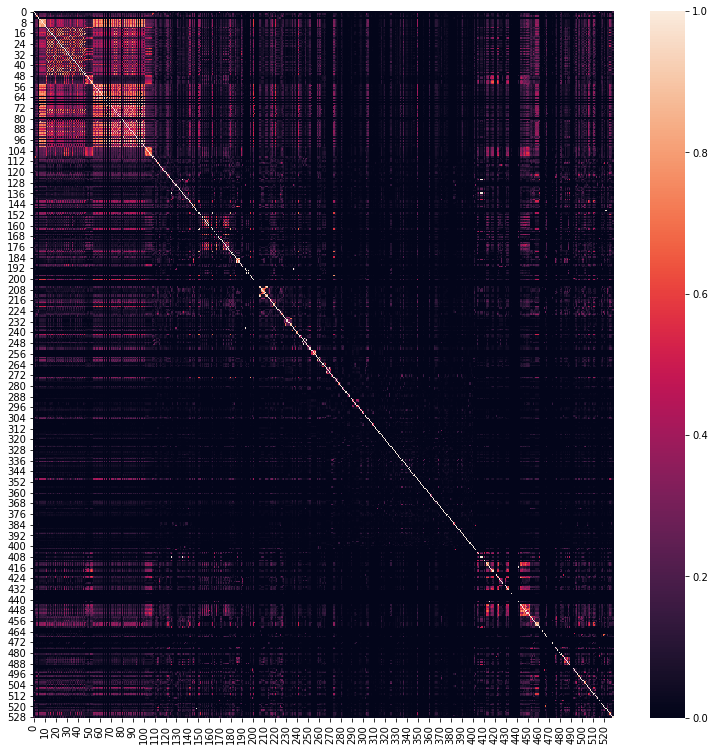

In [8]:
# intersection over union
intersections_relative = np.zeros((529,529))
assay_activations = []
for i in range(assay_all_np_true.shape[1]):
    assay_activations.append(set(np.argwhere(assay_all_np_true[:,i]==1).flatten()))
    
for i in range(529):
    for j in range(529):
        if len(assay_activations[i]) != 0 and len(assay_activations[j]) != 0:
            intersections_relative[i,j] = len(assay_activations[i].intersection(assay_activations[j])) / len(assay_activations[i].union(assay_activations[j]))
            intersections_relative[j,i] = len(assay_activations[i].intersection(assay_activations[j])) / len(assay_activations[i].union(assay_activations[j]))
        else:
            intersections_relative[i,j] = 0
            intersections_relative[j,i] = 0
        
        
plt.gcf().set_size_inches(13, 13)    
sb.heatmap(intersections_relative)

/home/jupyter-nmoshkov@broadinst-04e9f/.local/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1224x2160 with 0 Axes>

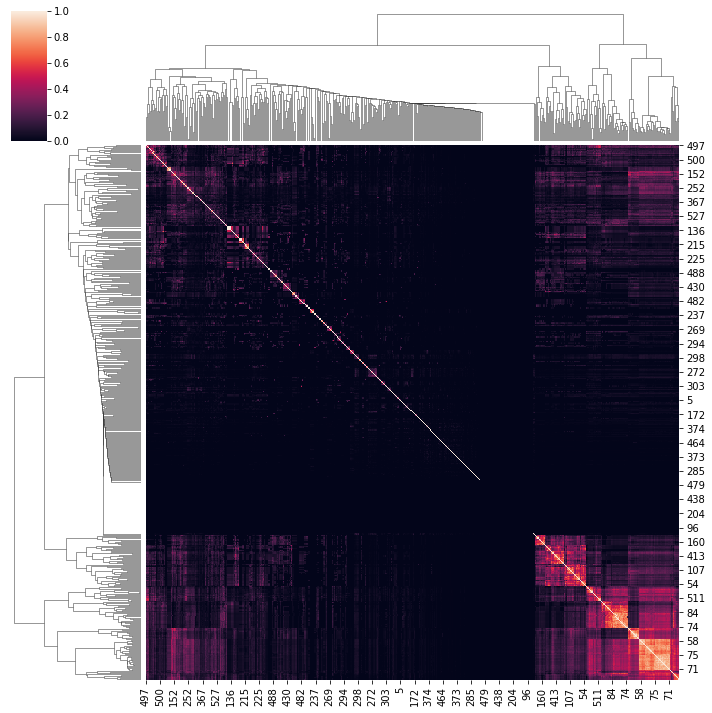

In [9]:
#Clustering
plt.gcf().set_size_inches(17, 30)  
pl = sb.clustermap(intersections_relative, metric = 'euclidean')

In [14]:
# Make an IoU matrix with the order of element from clustering
intersections_relative_reorder = np.zeros((529,529))
for i in range(len(pl.dendrogram_row.reordered_ind)):
    for j in range(len(pl.dendrogram_row.reordered_ind)):
        intersections_relative_reorder[j,i] = intersections_relative[pl.dendrogram_row.reordered_ind[j],pl.dendrogram_row.reordered_ind[i]]
        intersections_relative_reorder[i,j] = intersections_relative[pl.dendrogram_row.reordered_ind[i],pl.dendrogram_row.reordered_ind[j]]

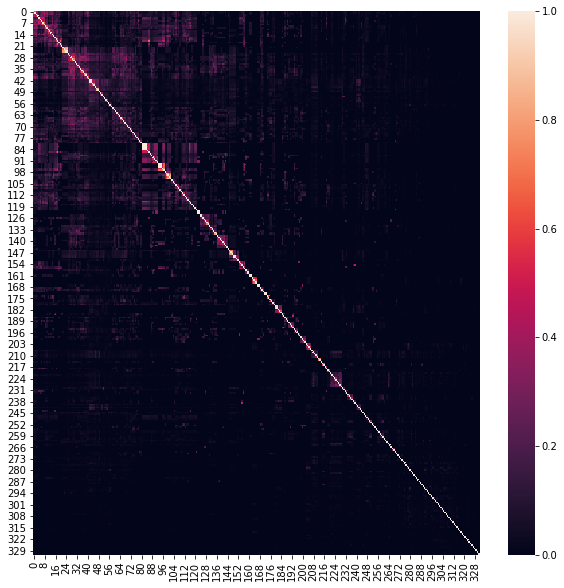

In [15]:
intersections_relative_reorder_n = np.zeros((332,332))
for i in range(332):
    for j in range(332):
        intersections_relative_reorder_n[j,i] = intersections_relative[pl.dendrogram_row.reordered_ind[j],pl.dendrogram_row.reordered_ind[i]]
        intersections_relative_reorder_n[i,j] = intersections_relative[pl.dendrogram_row.reordered_ind[i],pl.dendrogram_row.reordered_ind[j]]

    
plt.gcf().set_size_inches(10, 10) 
sb.heatmap(intersections_relative_reorder_n)

In [20]:
all_miss = np.all(assay_all_np[:,pl.dendrogram_row.reordered_ind[:332]] == -1, axis=1)
print(np.argwhere(all_miss) == True)

[]


In [21]:
#now only val set 

In [22]:
assay_all_np_true

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
with open('/home/jupyter-nmoshkov@broadinst-04e9f/PUMA/scaffold_based_split.npz', 'rb') as data:
    chem_clusters = np.load(data, allow_pickle = True)
    chem_clusters = chem_clusters['features']

In [24]:
assay_all_np_true = assay_all_np_true[chem_clusters[4]]
assay_all_np_true.shape

(3395, 529)

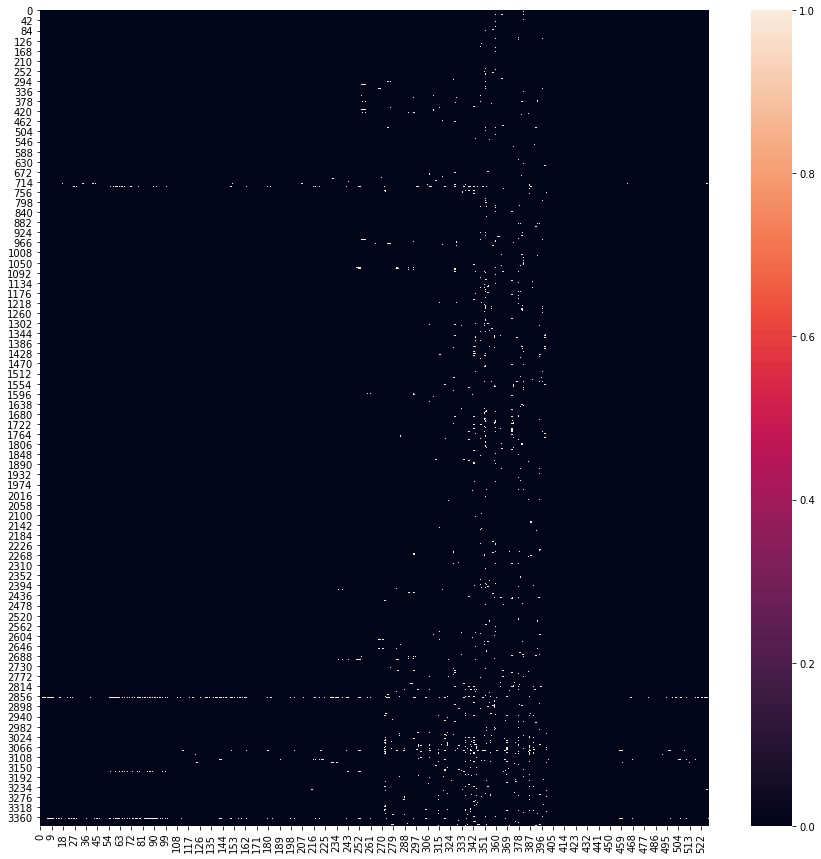

In [25]:
plt.gcf().set_size_inches(15, 15)
sb.heatmap(assay_all_np_true)

In [ ]:
intersections_relative = np.zeros((529,529))
assay_activations = []
for i in range(assay_all_np_true.shape[1]):
    assay_activations.append(set(np.argwhere(assay_all_np_true[:,i]==1).flatten()))
    
for i in range(529):
    for j in range(529):
        if len(assay_activations[i]) != 0 and len(assay_activations[j]) != 0:
            intersections_relative[i,j] = len(assay_activations[i].intersection(assay_activations[j])) / len(assay_activations[i].union(assay_activations[j]))
            intersections_relative[j,i] = len(assay_activations[i].intersection(assay_activations[j])) / len(assay_activations[i].union(assay_activations[j]))
        else:
            intersections_relative[i,j] = 0
            intersections_relative[j,i] = 0
        
        
plt.gcf().set_size_inches(13, 13)    
sb.heatmap(intersections_relative)

In [ ]:
plt.gcf().set_size_inches(25,25)  
pl = sb.clustermap(intersections_relative, metric = 'euclidean', cbar = False)
pl.cax.set_visible(False)
pl.ax_row_dendrogram.set_visible(False)
pl.ax_col_dendrogram.set_visible(False)
plt.show()

In [ ]:
intersections_relative.shape